# PRIMER ENTREGA

#### Entorno de trabajo

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

#### lectura de datos

In [3]:
df_employee_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/employee_survey_data.csv")
df_general = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/general_data.csv")
df_manager_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/manager_survey_data.csv")
df_time_work = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/time_work.csv")

# a. Diseño de solución propuesto

En primer instancia planteamos el uso de un modelo de regresión logística, puesto que dicho modelo es adecuado para problemas de clasificación binaria, como es el caso de este, donde se trata de predecir si un empleado abandonará su empleo o no.

Sin embargo también planteamos la alternativa de usar Árboles de decisión, ya que son un modelo de aprendizaje supervisado que puede ser utilizado para problemas de clasificación y regresión, con la desventaja que pueden ser menos precisos que los modelos de regresión logística.

# b. Limpieza y transformación de los datos

#### Información de cada tabla

In [4]:
print(df_employee_survey.info())
display(df_employee_survey.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB
None


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0


In [5]:
print(df_general.info())
display(df_general.head(3))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB
None


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3


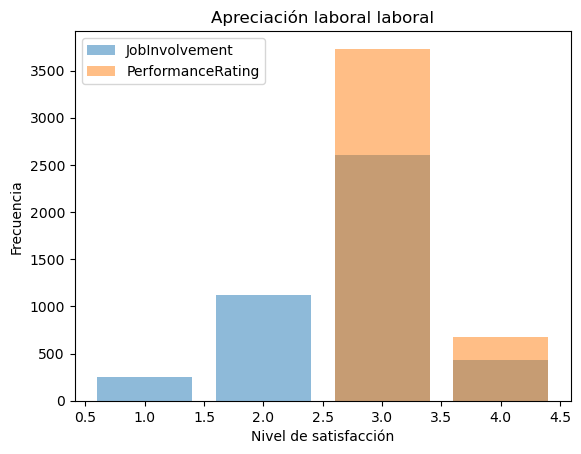

In [6]:
print(df_manager_survey.info())
display(df_manager_survey.head(3))


values_1 = df_manager_survey['JobInvolvement'].value_counts()
values_2 = df_manager_survey['PerformanceRating'].value_counts()

fig, ax = plt.subplots()

# Crear los histogramas
ax.bar(values_1.index, values_1, alpha=0.5, label='JobInvolvement')
ax.bar(values_2.index, values_2, alpha=0.5, label='PerformanceRating')

ax.set_title('Apreciación laboral laboral')
ax.set_xlabel('Nivel de satisfacción')
ax.set_ylabel('Frecuencia')

ax.legend()
plt.show()

In [7]:
df_time_work.info()
df_time_work.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 1;6 to 4410;6
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   EmployeeID;mean_time  4410 non-null   int64
dtypes: int64(1)
memory usage: 68.9+ KB


,EmployeeID;mean_time
1;6,8702
2;7,316
3;6,8161


Corrección en lectura de la tabla 'time_work' Que esta separada por punto y coma

#### Lectura de tabla separada por ;

In [8]:
df_time_work = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/time_work.csv", sep=";")
df_time_work.info()
display(df_time_work.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EmployeeID  4410 non-null   int64 
 1   mean_time   4410 non-null   object
dtypes: int64(1), object(1)
memory usage: 69.0+ KB


,EmployeeID,mean_time
0,1,"6,8702"
1,2,"7,316"
2,3,"6,8161"
3,4,"6,7892"
4,5,"7,8776"


#### Union de las tablas

In [3]:
df_employee_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/employee_survey_data.csv")
df_general = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/general_data.csv")
df_manager_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/manager_survey_data.csv")
df_time_work = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/time_work.csv", sep=";")

In [4]:
df = df_employee_survey.merge(df_general, on="EmployeeID")
df = df.merge(df_manager_survey, on="EmployeeID")
df = df.merge(df_time_work, on="EmployeeID")

df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,mean_time
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,8,0,1.0,6,1,0,0,3,3,"6,8702"
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,8,1,6.0,3,5,1,4,2,4,"7,316"
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,8,3,5.0,2,5,0,3,3,3,"6,8161"


#### Columnas con un solo valor

##### Consulta

In [11]:
# Obtener la cantidad de valores únicos en cada columna
nunique_values = df.nunique()

# Seleccionar las columnas con un solo valor
single_value_columns = nunique_values[nunique_values == 1].index

print("Variables con un único valor: ", single_value_columns)

Variables con un único valor:  Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')


In [12]:
df[['EmployeeCount', 'Over18', 'StandardHours']]

,EmployeeCount,Over18,StandardHours
0,1,Y,8
1,1,Y,8
2,1,Y,8
3,1,Y,8
4,1,Y,8
...,...,...,...
4405,1,Y,8
4406,1,Y,8
4407,1,Y,8
4408,1,Y,8


##### Eliminación de columnas con un solo valor y EmployeeID

In [5]:
df_drop_unique = df.drop(["EmployeeID","EmployeeCount", "Over18", "StandardHours"], axis=1)

nunique_values = df_drop_unique.nunique()
single_value_columns = nunique_values[nunique_values == 1].index
print("Variables con un único valor: ", single_value_columns)
df_drop_unique.info()
df_drop_unique.head(10)

Variables con un único valor:  Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4385 non-null   float64
 1   JobSatisfaction          4390 non-null   float64
 2   WorkLifeBalance          4372 non-null   float64
 3   Age                      4410 non-null   int64  
 4   Attrition                4410 non-null   object 
 5   BusinessTravel           4410 non-null   object 
 6   Department               4410 non-null   object 
 7   DistanceFromHome         4410 non-null   int64  
 8   Education                4410 non-null   int64  
 9   EducationField           4410 non-null   object 
 10  Gender                   4410 non-null   object 
 11  JobLevel                 4410 non-null   int64  
 12  JobRole                  4410 non-null   object 
 13  MaritalStatus        

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,mean_time
0,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,...,11,0,1.0,6,1,0,0,3,3,"6,8702"
1,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,23,1,6.0,3,5,1,4,2,4,"7,316"
2,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,...,15,3,5.0,2,5,0,3,3,3,"6,8161"
3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,...,11,3,13.0,5,8,7,5,2,3,"6,7892"
4,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,...,12,2,9.0,2,6,0,4,3,3,"7,8776"
5,3.0,2.0,2.0,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,...,13,0,28.0,5,7,7,7,3,3,"10,2758"
6,1.0,3.0,1.0,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,...,20,1,5.0,2,0,0,0,3,4,"6,4509"
7,1.0,2.0,3.0,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,...,22,3,10.0,2,0,0,0,3,4,"6,5636"
8,2.0,4.0,3.0,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,...,21,0,10.0,2,9,7,8,3,4,"6,6843"
9,2.0,1.0,3.0,25,No,Non-Travel,Research & Development,7,4,Medical,...,13,1,6.0,2,6,1,5,3,3,"6,6536"


#### Tratamiento para nulos

In [6]:
df_no_nulos = df_drop_unique

median_TotalWorkingYears = df_no_nulos['TotalWorkingYears'].median()
median_NumCompaniesWorked = df_no_nulos['NumCompaniesWorked'].median()
mode_WorkLifeBalance = df_no_nulos['WorkLifeBalance'].mode().iloc[0]
mode_JobSatisfaction = df_no_nulos['JobSatisfaction'].mode().iloc[0]
mode_EnvironmentSatisfaction = df_no_nulos['EnvironmentSatisfaction'].mode().iloc[0]


df_no_nulos['TotalWorkingYears'].fillna(median_TotalWorkingYears, inplace=True)
df_no_nulos['NumCompaniesWorked'].fillna(median_NumCompaniesWorked, inplace=True)
df_no_nulos['WorkLifeBalance'].fillna(mode_WorkLifeBalance, inplace=True)
df_no_nulos['JobSatisfaction'].fillna(mode_JobSatisfaction, inplace=True)
df_no_nulos['EnvironmentSatisfaction'].fillna(mode_EnvironmentSatisfaction, inplace=True)

In [7]:
df_no_nulos.isnull().sum()

EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
mean_time                  0
dtype: int64

#### Correción del tipo de cada variable

In [8]:
df_type = df_no_nulos

df_type['mean_time'] = df_type['mean_time'].str.replace(',', '.')
df_type['mean_time'] = df_type['mean_time'].astype('float64')

# c. Análisis exploratorio de los datos

#### Attrition (Categorica) vs catergoricas

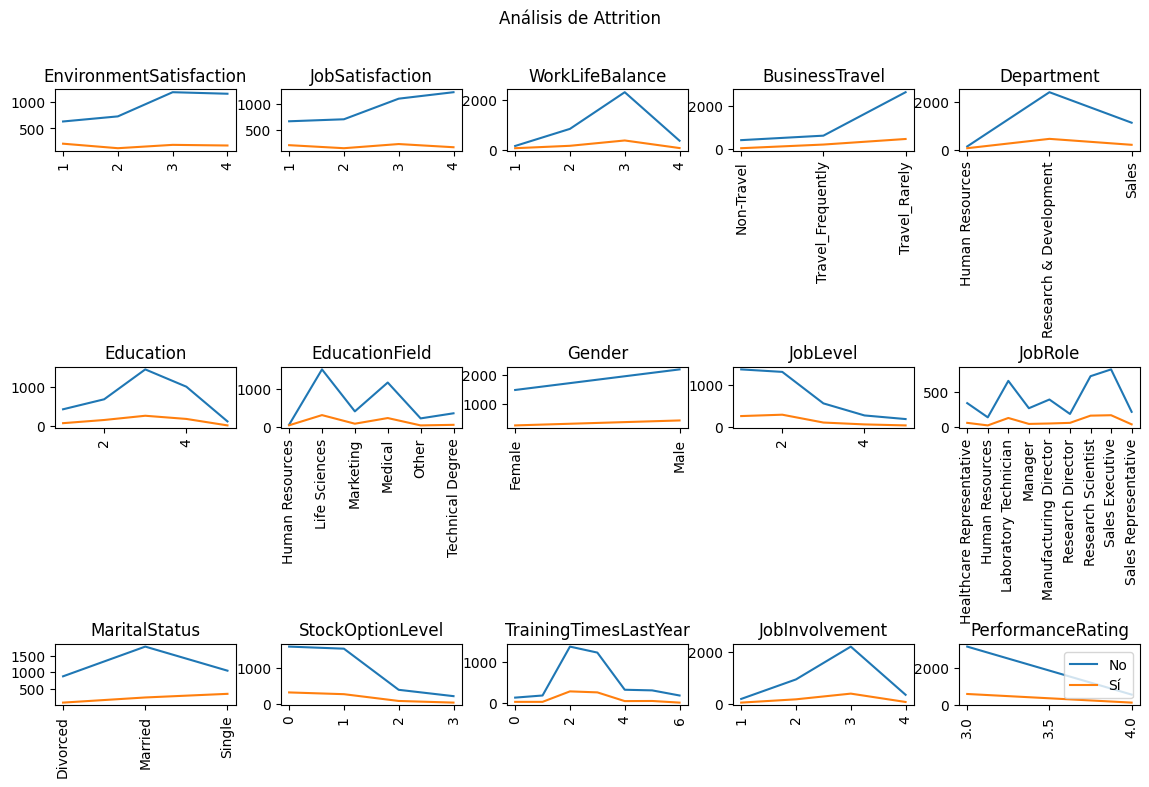

In [9]:
fig, axs = plt.subplots(3, 5, figsize=(14, 8))

gráficos = [
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'WorkLifeBalance',
    'BusinessTravel',
    'Department',
    'Education',
    'EducationField',
    'Gender',
    'JobLevel',
    'JobRole',
    'MaritalStatus',
    'StockOptionLevel',
    'TrainingTimesLastYear',
    'JobInvolvement',
    'PerformanceRating',
]

for i, gráfico in enumerate(gráficos):
    axs[i // 5, i % 5].plot(df_type.groupby(gráfico)['Attrition'].value_counts().unstack())
    axs[i // 5, i % 5].set_title(gráfico)
    # Girar las etiquetas del eje x
    axs[i // 5, i % 5].set_xticklabels(axs[i // 5, i % 5].get_xticklabels(), rotation=90)

plt.subplots_adjust(wspace=0.25, hspace=3.5)
plt.legend(['No', 'Sí'], loc='lower right')
plt.suptitle('Análisis de Attrition')
plt.show()

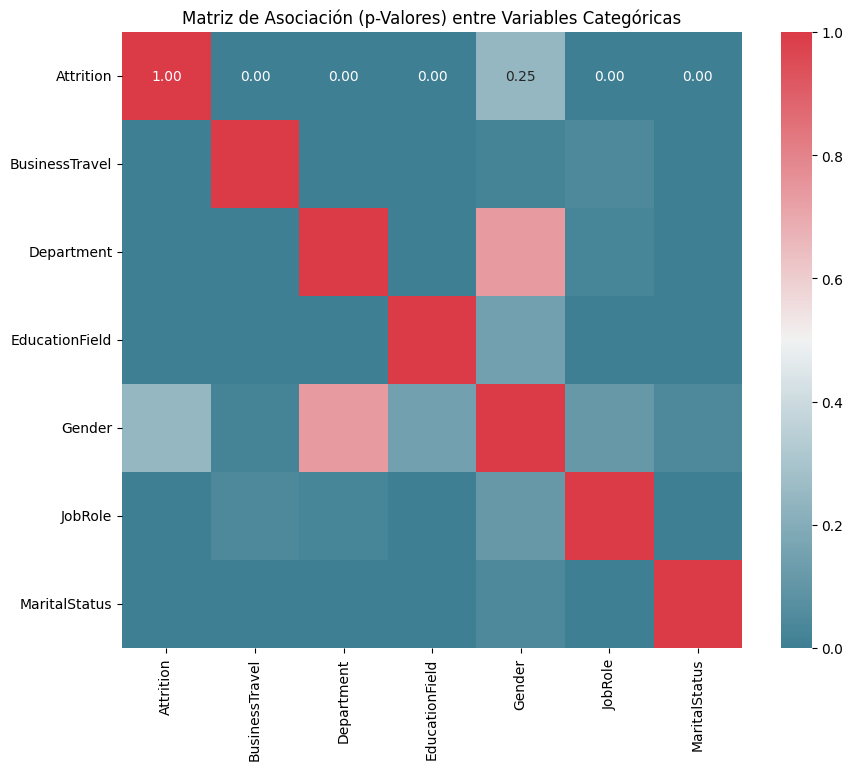

In [10]:
# Seleccionar solo las columnas categóricas
df_categoricas = df_type.select_dtypes(include=['object'])

# Crear una matriz vacía para almacenar los valores de p-valor
p_values = []

# Correlación de chi-cuadrado y los p-valores
for col1 in df_categoricas.columns:
    row_p_values = []
    for col2 in df_categoricas.columns:
        if col1 == col2:
            row_p_values.append(1.0)  # Poner 1.0 en la diagonal principal
        else:
            contingency_table = pd.crosstab(df_categoricas[col1], df_categoricas[col2])
            _, p, _, _ = chi2_contingency(contingency_table)
            row_p_values.append(p)
    p_values.append(row_p_values)

# Crear un DataFrame de p-valores
p_value_df = pd.DataFrame(p_values, columns=df_categoricas.columns, index=df_categoricas.columns)

plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(p_value_df, annot=True, cmap=cmap, fmt=".2f")
plt.title("Matriz de Asociación (p-Valores) entre Variables Categóricas")
plt.show()

Se decide eliminar la variable 'Gender' puesto que tiende a una distribución uniforme respecto a la variable 'Attrition' (variable objetivo) y tambien se corrobora en la matriz de correlaciones gran relación respecto la variable objetivo y ello no aporta al modelo.

In [11]:
df_type = df_type.drop('Gender', axis=1)

#### Attrition (Categorica) vs numericas

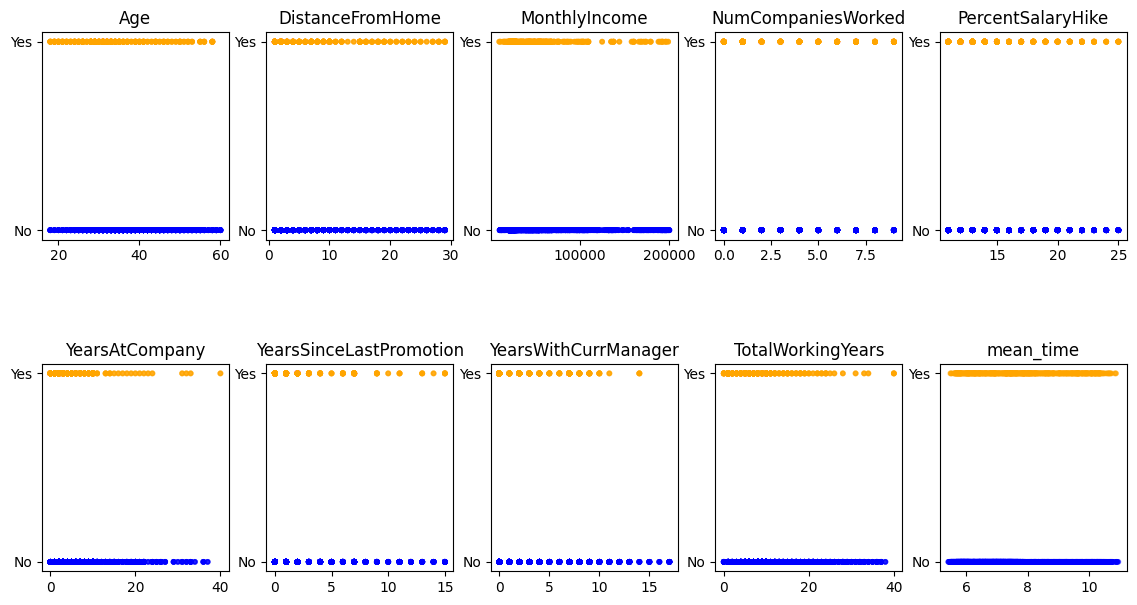

In [12]:
# Crear una figura con tres filas y cinco columnas
fig, axs = plt.subplots(2, 5, figsize=(14, 7))

# Crear los gráficos
for i, gráfico in enumerate(
    [
        'Age',
        'DistanceFromHome',
        'MonthlyIncome',
        'NumCompaniesWorked',
        'PercentSalaryHike',
        'YearsAtCompany',
        'YearsSinceLastPromotion',
        'YearsWithCurrManager',
        'TotalWorkingYears',
        'mean_time',
    ]
):
    # Crear un gráfico de dispersión para la variable numérica
    axs[i // 5, i % 5].scatter(
        df_no_nulos[gráfico], df_type['Attrition'], alpha=0.5, s=10, 
        c=df_no_nulos['Attrition'].map({'No': 'blue', 'Yes': 'orange'}),
    )
    # Agregar una leyenda
    axs[i // 5, i % 5].set_title(gráfico)
    # Ajustar el diseño de la figura
    plt.subplots_adjust(wspace=0.2, hspace=0.6)

# Mostrar la figura
plt.show()

Las variables numéricas que serán eliminadas por su alta correlación con la variable objetivo y su distribución uniforme respecto a esta. 

In [ ]:
columnas_a_eliminar = ['Age', 'PercentSalaryHike', 'NumCompaniesWorked', 'DistanceFromHome']
df_type = df_type.drop(columnas_a_eliminar, axis=1)

#### Relación entre numericas

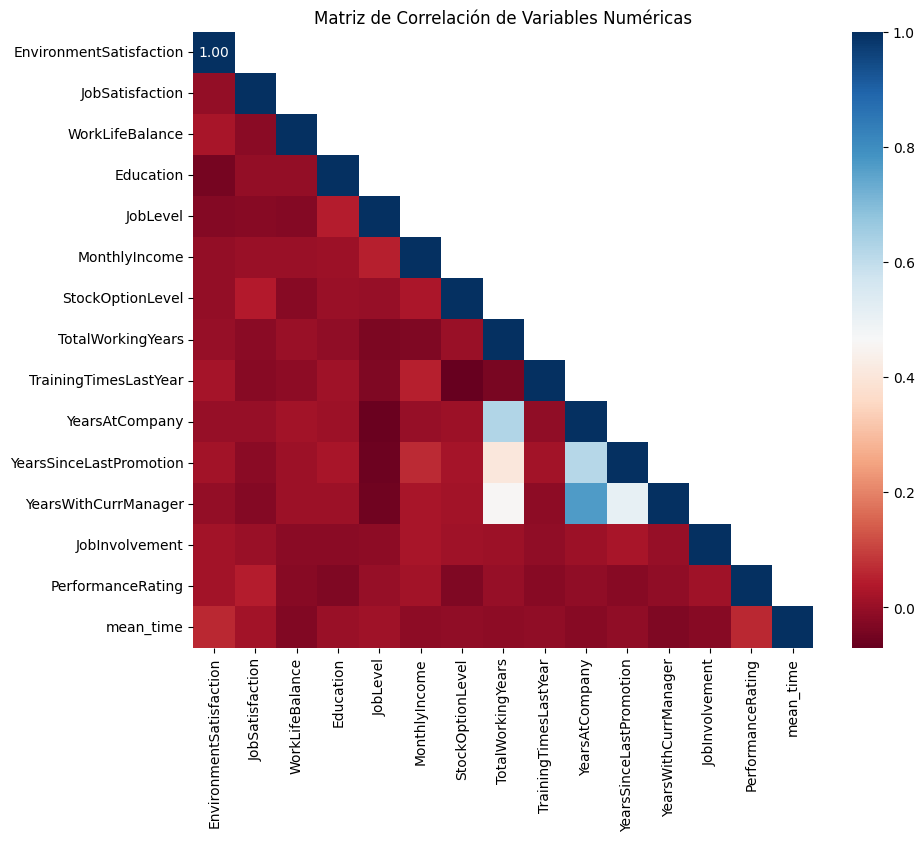

In [15]:
df_numericas = df_type.select_dtypes(include=[np.number])
correlation_matrix = df_numericas.corr()
mask = np.triu(correlation_matrix, k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu", mask=mask)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

# d. Preparación de los datos

Elección de variables. Definición de dataset base

In [16]:
df_base = df_type.rename(columns = {'Attrition' : 'target'})
df_base['target'] = df_base['target'].replace({'Yes': 1, 'No': 0})
df_base.target = df_base['target'].astype('int64')
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4410 non-null   float64
 1   JobSatisfaction          4410 non-null   float64
 2   WorkLifeBalance          4410 non-null   float64
 3   target                   4410 non-null   int64  
 4   BusinessTravel           4410 non-null   object 
 5   Department               4410 non-null   object 
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  StockOptionLevel         4410 non-null   int64  
 13  TotalWorkingYears        4410 non-null   float64
 14  TrainingTimesLastYear   

In [17]:
df_base['TrainingTimesLastYear'] = df_base['TrainingTimesLastYear'].astype('category')

In [18]:
#Convierta las columnas en variables dummy utilizando pd.get_dummies()
df_base = pd.get_dummies(df_base)
# Imprimir primeras 3 filas
df_base.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,target,Education,JobLevel,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,...,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,TrainingTimesLastYear_0,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6
0,3.0,4.0,2.0,0,2,1,131160,0,1.0,1,...,False,True,False,False,False,False,False,False,False,True
1,3.0,2.0,4.0,1,1,1,41890,1,6.0,5,...,False,False,True,False,False,False,True,False,False,False
2,2.0,2.0,1.0,0,4,4,193280,3,5.0,5,...,False,True,False,False,False,True,False,False,False,False
3,4.0,4.0,3.0,0,5,3,83210,3,13.0,8,...,False,True,False,False,False,False,False,False,True,False
4,4.0,1.0,3.0,0,1,1,23420,2,9.0,6,...,False,False,True,False,False,True,False,False,False,False


# Modelos sin selección de variables

#### Modelo Logistic Regression

In [19]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EnvironmentSatisfaction            4410 non-null   float64
 1   JobSatisfaction                    4410 non-null   float64
 2   WorkLifeBalance                    4410 non-null   float64
 3   target                             4410 non-null   int64  
 4   Education                          4410 non-null   int64  
 5   JobLevel                           4410 non-null   int64  
 6   MonthlyIncome                      4410 non-null   int64  
 7   StockOptionLevel                   4410 non-null   int64  
 8   TotalWorkingYears                  4410 non-null   float64
 9   YearsAtCompany                     4410 non-null   int64  
 10  YearsSinceLastPromotion            4410 non-null   int64  
 11  YearsWithCurrManager               4410 non-null   int64

In [20]:
# Separación de caracteristicas y target
y = df_base.target
X = df_base.drop(["target"], axis=1)


#Cambiar tipo los int a float
columnasint = ["PerformanceRating","JobInvolvement","YearsWithCurrManager","YearsSinceLastPromotion","YearsAtCompany","StockOptionLevel","MonthlyIncome","JobLevel","Education"]
df_base[columnasint] = df_base[columnasint].astype(float)
numeric_columns=list(X.select_dtypes('float64').columns)
pipeline=ColumnTransformer([('num', StandardScaler() , numeric_columns)], remainder='passthrough')

print( X.shape)
print(y.shape)

(4410, 45)
(4410,)


In [21]:
# Separación de los datos de entrenamiento y validación
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('Tamaño del conjunto de entrenamiento: ', x_train.shape)
print('Tamaño del conjunto de validación: ', x_test.shape)

Tamaño del conjunto de entrenamiento:  (3528, 45)
Tamaño del conjunto de validación:  (882, 45)


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Entrenamiento del modelo
modelo = LogisticRegression()

# Ajustar el modelo a los datos
modelo.fit(x_train, y_train)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(x_train)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred) )

Exactitud en el entrenamiento: 0.840


In [23]:
y_pred = modelo.predict(x_test)

# Exactitud en el conjunto de validación
print('Exactitud en el modelo de validación: %.3f'  %accuracy_score(y_test, y_pred) )

Exactitud en el modelo de validación: 0.833


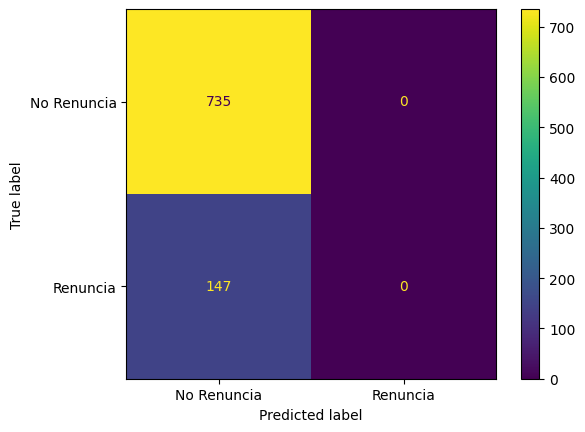

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mc = confusion_matrix(y_test, y_pred)

mc_display = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels=['No Renuncia', 'Renuncia'])
mc_display.plot()
plt.show()

In [25]:
tn, fp, fn, tp = mc.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: nan
Recall: 0.0
Especificidad: 1.0
F1 score: nan


#### Modelo de Regresión Random Forest Regressor

In [26]:
# Separación de caracteristicas y target
# ==============================================================================
X = df_base.drop(columns = "target")
y = df_base["target"]

# split de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [27]:
from sklearn.ensemble import RandomForestClassifier
# Entrenamiento del modelo
# ==============================================================================
ranfor = RandomForestClassifier(
            n_estimators = 150,
            criterion    = 'gini',
            max_depth    = 5,
            max_leaf_nodes = 10,
            n_jobs       = -1,
            random_state = 123
         )
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=10, n_estimators=150,
                       n_jobs=-1, random_state=123)

In [28]:
from sklearn import metrics
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test)))

Train - Accuracy : 0.8475056689342404
Train - classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2962
           1       1.00      0.05      0.09       566

    accuracy                           0.85      3528
   macro avg       0.92      0.52      0.51      3528
weighted avg       0.87      0.85      0.78      3528

Test - Accuracy : 0.8435374149659864
Test - classification report :               precision    recall  f1-score   support

           0       0.84      1.00      0.91       737
           1       1.00      0.05      0.09       145

    accuracy                           0.84       882
   macro avg       0.92      0.52      0.50       882
weighted avg       0.87      0.84      0.78       882



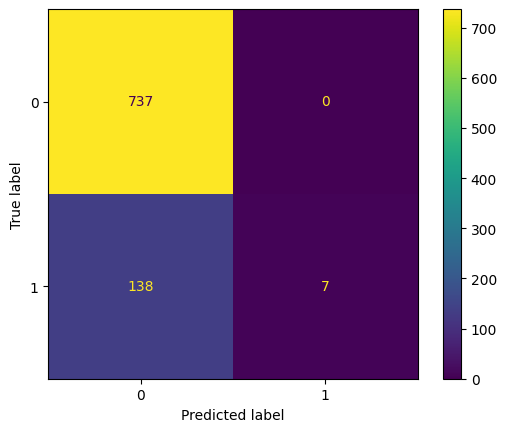

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, ranfor.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

##### Selección de variables

In [30]:
# Separación de caracteristicas y target
X_class = df_base.drop(['target'], axis=1)
y_class = df_base['target']

print(X_class.shape)
print(y_class.shape)

(4410, 45)
(4410,)


In [31]:
# Para clasificación
from sklearn.feature_selection import SelectKBest, f_classif

# Función de filtro de caracteristicas - stadis. scores
def select_kbest_classification(X,y,score_f,k):
    sel_kb = SelectKBest(score_func=score_f, k=k)
    sel_kb.fit(X,y)
    new_cols = sel_kb.get_support()
    print("Scores:\n", sel_kb.scores_, "\nP-values:\n", sel_kb.pvalues_)
    return new_cols

In [32]:
# Obtener columnas seleciconadas - (10 caracteristicas)
X_new_class = select_kbest_classification(X_class, y_class, f_classif, 10)
# Nuevo conjunto de datos
df_classification_new = X_class.iloc[:,X_new_class]
df_classification_new.head()

Scores:
 [4.59994835e+01 4.82140804e+01 1.75509374e+01 1.00678519e+00
 4.66760523e-01 4.28857038e+00 2.06171371e-01 1.31440614e+02
 8.10784452e+01 4.81102093e+00 1.10236968e+02 1.07132817e+00
 2.41560201e+00 1.81550273e+02 2.45736984e+01 5.92258389e+01
 1.08438314e+01 2.89439474e+01 1.03299381e+00 1.71860502e+00
 3.72765138e+01 6.77229297e-01 6.29940950e-02 2.56987898e-03
 2.97218669e+00 7.29454073e+00 8.35668863e-01 8.46517382e-01
 6.12947520e-03 1.39681097e+00 9.25371574e+00 1.09417542e+01
 3.32634238e+00 5.20766108e-01 5.40565982e-01 3.41788228e+01
 3.67941159e+01 1.39947949e+02 7.13780196e-01 6.87158268e-01
 2.18058674e+00 3.17372959e+00 2.88877044e+00 9.68823682e-01
 1.50365914e+01] 
P-values:
 [1.33942461e-11 4.37925744e-12 2.85184355e-05 3.15729318e-01
 4.94517173e-01 3.84274849e-02 6.49807294e-01 5.26004001e-30
 3.16388312e-19 2.83303362e-02 1.73393227e-25 3.00702414e-01
 1.20203569e-01 1.39929001e-40 7.42066628e-07 1.72353105e-14
 9.99071052e-04 7.83649642e-08 3.09512324e-01 1

,EnvironmentSatisfaction,JobSatisfaction,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,mean_time,BusinessTravel_Travel_Frequently,EducationField_Human Resources,MaritalStatus_Married,MaritalStatus_Single
0,3.0,4.0,1.0,1.0,0.0,6.8702,False,False,True,False
1,3.0,2.0,6.0,5.0,4.0,7.3160,True,False,False,True
2,2.0,2.0,5.0,5.0,3.0,6.8161,True,False,True,False
3,4.0,4.0,13.0,8.0,5.0,6.7892,False,False,True,False
4,4.0,1.0,9.0,6.0,4.0,7.8776,False,False,False,True


In [33]:
X_new_class

array([ True,  True, False, False, False, False, False,  True,  True,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False])

In [34]:
df2 = df_base[['target','EnvironmentSatisfaction', 'JobSatisfaction', 'TotalWorkingYears', 'YearsWithCurrManager','mean_time','YearsAtCompany','BusinessTravel_Travel_Frequently','EducationField_Human Resources','MaritalStatus_Married','MaritalStatus_Single']]

# f. Selección y aplicación de algoritmos/ técnicas de modelado (al menos 3 algoritmos vistos en clase)

In [35]:

# Separación de variables
y = df2.target
x = df2.drop(['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

#### Separación de los datos de entrenamiento y validación

In [36]:
# Separación de los datos de entrenamiento y validación
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

print('Tamaño del conjunto de entrenamiento: ', x_train.shape)
print('Tamaño del conjunto de validación: ', x_test.shape)

Tamaño del conjunto de entrenamiento:  (3528, 10)
Tamaño del conjunto de validación:  (882, 10)


#### Modelo Logistic Regression

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Entrenamiento del modelo
modelo = LogisticRegression()

# Ajustar el modelo a los datos
modelo.fit(x_train, y_train)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(x_train)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred) )

Exactitud en el entrenamiento: 0.858


In [38]:
y_pred = modelo.predict(x_test)

# Exactitud en el conjunto de validación
print('Exactitud en el modelo de validación: %.3f'  %accuracy_score(y_test, y_pred) )

Exactitud en el modelo de validación: 0.844


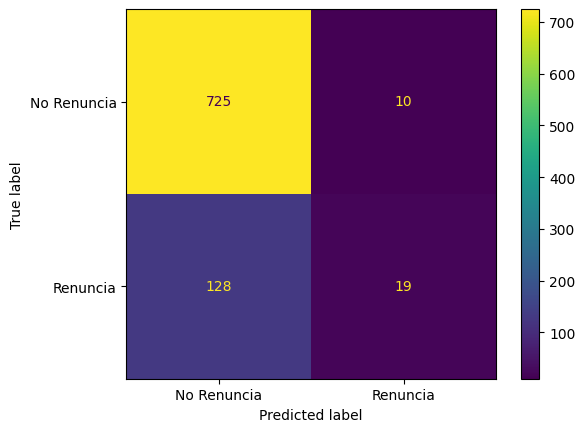

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mc = confusion_matrix(y_test, y_pred)

mc_display = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels=['No Renuncia', 'Renuncia'])
mc_display.plot()
plt.show()

In [53]:
tn, fp, fn, tp = mc.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.6551724137931034
Recall: 0.1292517006802721
Especificidad: 0.9863945578231292
F1 score: 0.2159090909090909


# i. Evaluación y análisis del mejor modelo

- **Modelo de Regresión Logistica sin selección de variables** 

    Resultados del modelo:

    - Precision: nan
    - Recall: 0.0
    - Especificidad: 1.0
    - F1 score: nan

    Con base en los resultados obtenidos, conclimos que el modelo de regresión logística no es capaz de predecir correctamente la variable objetivo, esto es evidente en la precisión, el recall y el F1 score los cuales son valores muy bajos.

- **Modelo de Regresión Logistica con selección de variables** 

    Resultados del modelo:

    - Exactitud en el entrenamiento: 0.858

    Predijo correctamente el 85.8% de los casos del conjunto de datos de entrenamiento.

    Sin embargo, es importante tener en cuenta que la precisión en el entrenamiento no siempre es una buena medida de la precisión en el conjunto de datos de prueba. Esto se debe a que el modelo puede estar sobreajustado al conjunto de datos de entrenamiento, lo que significa que puede funcionar bien en el conjunto de datos de entrenamiento pero no tan bien en el conjunto de datos de prueba.


- **Modelo de Regresión Random Forest Regressor sin selección de variables**

    Resultados del modelo:
    - Train - Accuracy : 0.8475056689342404
    - Test - Accuracy : 0.8435374149659864

    Del sus resultados pudimos concluir que el modelo de regresión Random Forest Regressor es capaz de predecir correctamente la variable dependiente con un alto grado de precisión. El modelo predijo correctamente el 84.75% de los casos del conjunto de datos de entrenamiento y a su ves 84.35% de los casos del conjunto de datos de prueba.

    La diferencia entre el Train Accuracy y el Test Accuracy es muy baja, lo que nos indica que el modelo no está sobreajustado.

- **Modelo RandomForest Classifier con selección de variables**

    En este caso, analizando la matriz de confusión, el modelo predijo correctamente 725 casos positivos y 128 casos negativos. El modelo también predijo incorrectamente 10 casos negativos como positivos y 19 casos positivos como negativos.

    La precision por su parte es la proporción de casos positivos que el modelo predice correctamente. En este caso, la precisión es de 725 / (725 + 10) = 0.9875, lo que significa que el modelo predijo correctamente el 98.75% de los casos positivos.

    Recall es la proporción de casos positivos que el modelo predice correctamente. En este caso, el recall es de 725 / (725 + 128) = 0.8607, lo que significa que el modelo predijo correctamente el 86.07% de todos los casos positivos.



# j. Conclusiones finales y recomendaciones

- El modelo de regresión logística con variables seleccionadas fue el que presento sobreajuste,  tiene una precisión de entrenamiento de 0.858, que es significativamente mayor que la precisión de prueba de 0.825. Esta diferencia indica que el modelo se ha ajustado demasiado a los datos de entrenamiento.

- En ese caso, el modelo que se debe elegir es el RandomForest Classifier, dicho modelo está diseñado para predecir variables categóricas.

    El modelo RandomForest Classifier tiene una precisión de entrenamiento y de prueba similar, lo que indica que no está sobreajustado. Además, el modelo es capaz de predecir correctamente la variable dependiente con un alto grado de precisión

